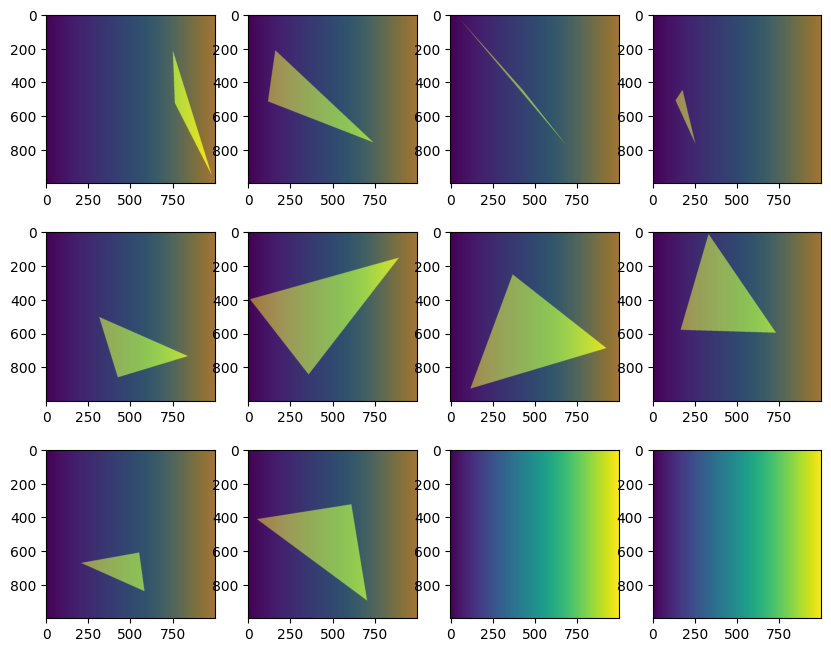

In [ ]:
""" 
Playing around with torch.meshgrid
"""

import torch
import matplotlib.pyplot as plt
import math

# takes in a three dimensional tensor and creates a random triangular mask on each batch
def boolean_mask(B, H, W):
    # generate the random coordinates
    corners = torch.rand(B, 3, 2)
    corners[:, :, 0] *= W
    corners[:, :, 1] *= H

    
    y = torch.arange(H)
    x = torch.arange(W)
    
    Y, X = torch.meshgrid(y, x, )


    # reshape into [1, H, W]
    Y = Y.unsqueeze(0)
    X = X.unsqueeze(0)

    # store all of the corner coordinates with shape [B, H, W]
    x1 = corners[:, 0, 0].view(B, 1, 1)
    y1 = corners[:, 0, 1].view(B, 1, 1)
    x2 = corners[:, 1, 0].view(B, 1, 1)
    y2 = corners[:, 1, 1].view(B, 1, 1)
    x3 = corners[:, 2, 0].view(B, 1, 1)
    y3 = corners[:, 2, 1].view(B, 1, 1)

    # calculate the cross product from each starting corner to determine which side of the edge a point (X, Y) lies
    sign1 = (x2 - x1) * (Y - y1) - (y2 - y1) * (X - x1)
    sign2 = (x3 - x2) * (Y - y2) - (y3 - y2) * (X - x2)
    sign3 = (x1 - x3) * (Y - y3) - (y1 - y3) * (X - x3)

    # element wise comparison
    mask = (((sign1 >= 0) & (sign2 >= 0) & (sign3 >=0)) | ((sign1 <= 0) & (sign2 <= 0) & (sign3 <= 0)))

    # look at our result
    return mask, X.squeeze(), Y.squeeze()

# create an overlay for data visualization
def overlay(B, H, W):
    mask, x, y = boolean_mask(B, H, W)
    fig, axes = plt.subplots(math.floor(B ** 0.5), math.floor(B ** 0.5) + 1, figsize=(10,8))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(x)
        if (i < B):
            ax.imshow(mask[i], alpha=0.5)

overlay(10, 1000, 1000)
